In [1443]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
from math import log
from math import exp
from sklearn.model_selection import train_test_split 
data = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/athletes.csv') # датасет - https://www.kaggle.com/rio2016/olympic-games
data


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [1444]:
# Задача подобрать зависимость как рост зависит от пола

In [1445]:
data[ pd.isnull(data['height'])].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [1446]:
data = data[pd.isnull(data['height']) == 0 ]

In [1447]:
X = data ['height']
#X = X.astype(np.int)
X = X.reset_index(drop=True)
X

0        1.72
1        1.68
2        1.98
3        1.83
4        1.81
         ... 
11203    1.64
11204    1.73
11205    1.85
11206    1.60
11207    1.85
Name: height, Length: 11208, dtype: float64

In [1448]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1449]:
le.fit( data['sex'])

LabelEncoder()

In [1450]:
Y = pd.Series (data = le.transform(data['sex']))
Y

0        1
1        0
2        1
3        1
4        1
        ..
11203    0
11204    0
11205    1
11206    1
11207    1
Length: 11208, dtype: int32

In [1451]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=29)

In [1452]:
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

In [1453]:
# обычный градиентный спуск

In [1454]:
EPOCHS = 100
LEARNING_RATE = 0.0001

In [1455]:
def cost_function(X, Y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (Y[i]*log(theta0 + theta1*X[i]) + (1 - Y[i])*log(1 - theta0 - theta1*X[i]))
        #total_cost += (Y[i]*log(theta0 + theta1*X[i]))
    return -total_cost/len(X) 

In [1456]:
def der_theta0(X, Y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (Y[i] / (theta0 + theta1*X[i]) - (1 - Y[i]) / (1 - theta0 - theta1*X[i]))
        #total_cost += X[i]
    return -total_cost/len(X)    

In [1457]:
def der_theta1(X, Y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (Y[i] / (theta0 + theta1*X[i]) * X[i] - (1 - Y[i]) / (1 - theta0 - theta1*X[i]) * X[i])
        #total_cost += X[i]
    return -total_cost/len(X) 

In [1458]:
theta0 = 0.20
theta1 = 0.20
costs = []
for _ in range(EPOCHS):
    dt0 = der_theta0(X_train, Y_train, theta0, theta1)
    dt1 = der_theta1(X_train, Y_train, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    cost = cost_function(X_train, Y_train, theta0, theta1)
    costs.append(cost)
    #print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X_train, Y_train, theta0, theta1))

In [1459]:
print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X_train, Y_train, theta0, theta1))

t0: 0.19971772758735648 t1: 0.20062144738783597 cost: 0.6660120303466976


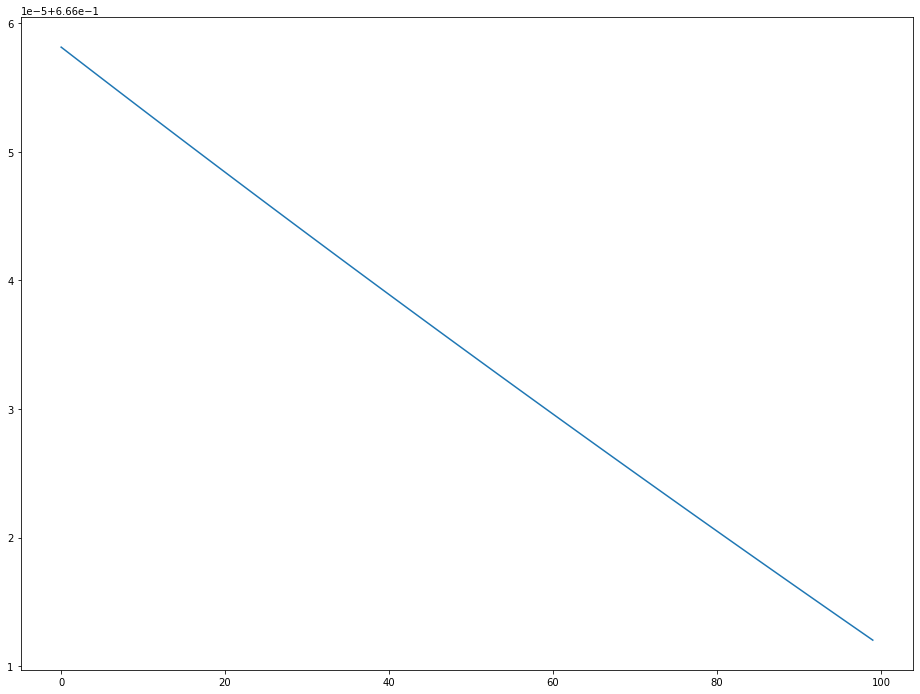

In [1460]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [1461]:
print("cost:", cost_function(X_test, Y_test, theta0, theta1))

cost: 0.6622781028944095


In [1462]:
def sigmoid(x, theta0, theta1):
       
    return 1/(1 - exp(-theta0 - x*theta1))

In [1463]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative


for i in range(len(X_test)):
    predictions = sigmoid(X_test[i], theta0, theta1)
    if predictions >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if Y_test[i] == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if Y_test[i] == 1:
            fn += 1
        else:
            tn += 1

In [1464]:
tp, fp, fn, tn

(1263, 979, 0, 0)

In [1465]:
# Accuracy
(tp + tn) / (tp + fp + fn + tn)

0.563336306868867

In [1466]:
# Precision
tp / (tp + fp)

0.563336306868867

In [1467]:
# Recall
tp / (tp + fn)

1.0

In [1468]:
# Nesterov Accelerated Gradient

In [1469]:
EPOCHS = 100
LEARNING_RATE = 0.0001
gamma = 0.9
eta = LEARNING_RATE * 0.1

In [1470]:
theta0 = 0.20
theta1 = 0.20
vtheta0 = 0
vtheta1 = 0

costs = []

for _ in range(EPOCHS):
    dt0 = der_theta0(X_train, Y_train, theta0 - gamma*vtheta0 , theta1)
    dt1 = der_theta1(X_train, Y_train, theta0, theta1 - gamma*vtheta1)
    
    vtheta0 = gamma*vtheta0 + eta*dt0
    vtheta1 = gamma*vtheta1 + eta*dt1
    
    theta0 = theta0 - vtheta0
    theta1 = theta1 - vtheta1
    
    cost = cost_function(X_train, Y_train, theta0, theta1)
    costs.append(cost)
    #print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

In [1471]:
print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X_train, Y_train, theta0, theta1))

t0: 0.19974653789882127 t1: 0.20057083617992652 cost: 0.666015902696762


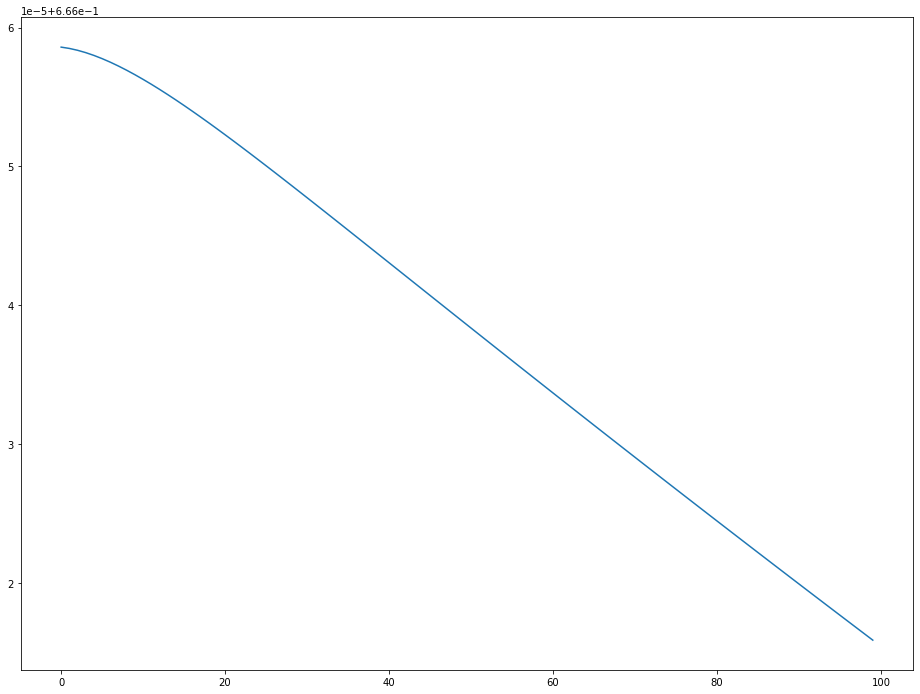

In [1472]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [1473]:
print("cost:", cost_function(X_test, Y_test, theta0, theta1))

cost: 0.6622864478938297


In [1474]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative


for i in range(len(X_test)):
    predictions = sigmoid(X_test[i], theta0, theta1)
    if predictions >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if Y_test[i] == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if Y_test[i] == 1:
            fn += 1
        else:
            tn += 1

In [1475]:
tp, fp, fn, tn

(1263, 979, 0, 0)

In [1476]:
# Accuracy
(tp + tn) / (tp + fp + fn + tn)

0.563336306868867

In [1477]:
# Precision
tp / (tp + fp)

0.563336306868867

In [1478]:
# Recall
tp / (tp + fn)

1.0

In [1479]:
#RMSProp

In [1480]:
EPOCHS = 100
LEARNING_RATE = 0.0001
gamma = 0.9
eta = LEARNING_RATE
epcilend = 0.00000001

In [1481]:
theta0 = 0.20
theta1 = 0.20
E0 = 0
E1 = 0

costs = []


for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    E0 = gamma*E0 + (1 - gamma)*(dt0**2)
    E1 = gamma*E1 + (1 - gamma)*(dt1**2)
    
    theta0 = theta0 - LEARNING_RATE*dt0/((E0 + epcilend)**0.5)
    theta1 = theta1 - LEARNING_RATE*dt1/((E1 + epcilend)**0.5)
    
    cost = cost_function(X_train, Y_train, theta0, theta1)
    costs.append(cost)

In [1482]:
print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 0.18826468861258314 t1: 0.2103995744987865 cost: 0.6643244274082547


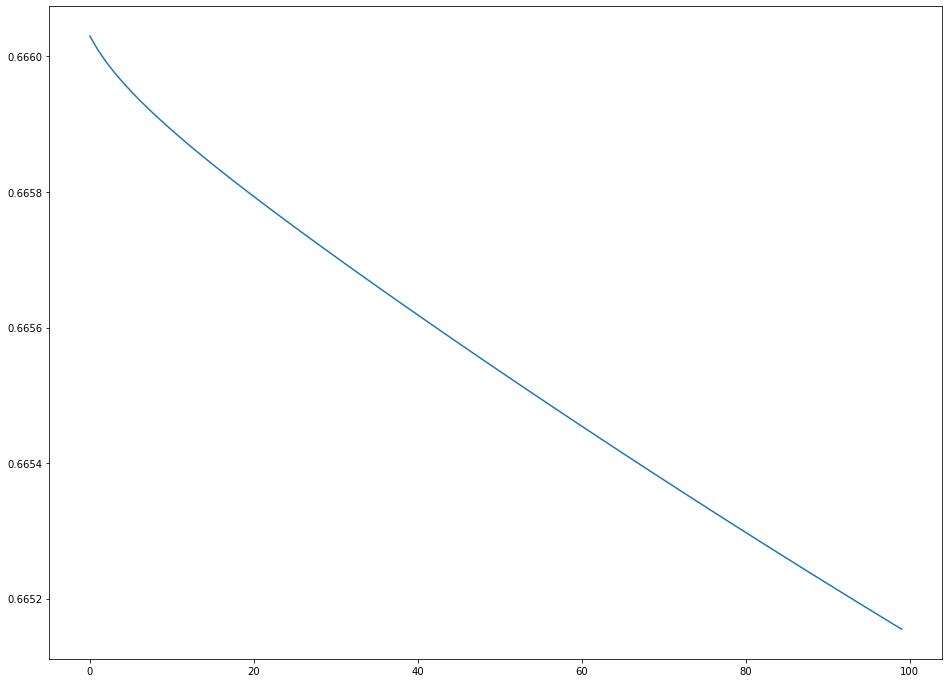

In [1483]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [1484]:
print("cost:", cost_function(X_test, Y_test, theta0, theta1))

cost: 0.6610022777139153


In [1485]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative


for i in range(len(X_test)):
    predictions = sigmoid(X_test[i], theta0, theta1)
    if predictions >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if Y_test[i] == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if Y_test[i] == 1:
            fn += 1
        else:
            tn += 1

In [1486]:
tp, fp, fn, tn

(1263, 979, 0, 0)

In [1487]:
# Accuracy
(tp + tn) / (tp + fp + fn + tn)

0.563336306868867

In [1488]:
# Precision
tp / (tp + fp)

0.563336306868867

In [1489]:
# Recall
tp / (tp + fn)

1.0

In [1490]:
# dataset Iris

In [1491]:
from sklearn import datasets

In [1492]:
iris = datasets.load_iris()
type(iris)
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [1493]:
X = iris.data[50:] # забираем данные из датасета
Y = iris.target[:100]
#len(iris.data)

In [1494]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=29)

In [1495]:
#X_train = X_train.reset_index(drop=True)
#Y_train = Y_train.reset_index(drop=True)
#X_test = X_test.reset_index(drop=True)
#Y_test = Y_test.reset_index(drop=True)

In [1496]:
def cost_function(X, Y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (Y[i]*log(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) + (1 - Y[i])*log(1 - theta0 - theta1*X[i,0] - theta2*X[i,1] - theta3*X[i,2] - theta4*X[i,3]))
       # total_cost += (Y[i]*log(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]))
    return -total_cost/len(X) 

In [1497]:
def der_theta0(X, Y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (Y[i] / (theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) + (1 - Y[i]) / (1 - theta0 - theta1*X[i,0] - theta2*X[i,1] - theta3*X[i,2] - theta4*X[i,3]))
        #total_cost += X[i]
    return -total_cost/len(X)   

In [1498]:
def der_theta1(X, Y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (Y[i] / (theta0 + theta1*X[i,0] + theta2*X[i,1] + theta1*X[i,2] + theta1*X[i,3]) * X[i,0] - (1 - Y[i]) / (1 - theta0 - theta1*X[i,0] - theta2*X[i,1] - theta1*X[i,2] - theta1*X[i,3]) * X[i,0])
        #total_cost += X[i]
    return -total_cost/len(X) 

In [1499]:
def der_theta2(X, Y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (Y[i] / (theta0 + theta1*X[i,0] + theta2*X[i,1] + theta1*X[i,2] + theta1*X[i,3]) * X[i,1] - (1 - Y[i]) / (1 - theta0 - theta1*X[i,0] - theta2*X[i,1] - theta1*X[i,2] - theta1*X[i,3]) * X[i,1])
        #total_cost += X[i]
    return -total_cost/len(X) 

In [1500]:
def der_theta3(X, Y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (Y[i] / (theta0 + theta1*X[i,0] + theta2*X[i,1] + theta1*X[i,2] + theta1*X[i,3]) * X[i,2] - (1 - Y[i]) / (1 - theta0 - theta1*X[i,0] - theta2*X[i,1] - theta1*X[i,2] - theta1*X[i,3]) * X[i,2])
        #total_cost += X[i]
    return -total_cost/len(X) 

In [1501]:
def der_theta4(X, Y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (Y[i] / (theta0 + theta1*X[i,0] + theta2*X[i,1] + theta1*X[i,2] + theta1*X[i,3]) * X[i,3] - (1 - Y[i]) / (1 - theta0 - theta1*X[i,0] - theta2*X[i,1] - theta1*X[i,2] - theta1*X[i,3]) * X[i,3])
        #total_cost += X[i]
    return -total_cost/len(X) 

In [1502]:
# обычный градиентный спуск

In [1503]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [1504]:
theta0 = 0.01
theta1 = 0.01
theta2 = 0.01
theta3 = 0.01
theta4 = 0.01

costs = []

for _ in range(EPOCHS):
    dt0 = der_theta0(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    dt1 = der_theta1(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    dt2 = der_theta2(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    dt3 = der_theta3(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    dt4 = der_theta4(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    theta2 -= LEARNING_RATE * dt2
    theta3 -= LEARNING_RATE * dt3
    theta4 -= LEARNING_RATE * dt4
    cost = cost_function(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    costs.append(cost)

In [1505]:
print("t0:", theta0, "t1:", theta1, "t2:", theta2, "t3:", theta3, "t4:", theta4, "cost:", cost_function(X_train, Y_train, theta0, theta1, theta2, theta3, theta4))

t0: 0.014876382260891491 t1: 0.02402828370624732 t2: 0.01620058097062161 t3: 0.022803873463519867 t4: 0.015026249672204868 cost: 0.6802964258878096


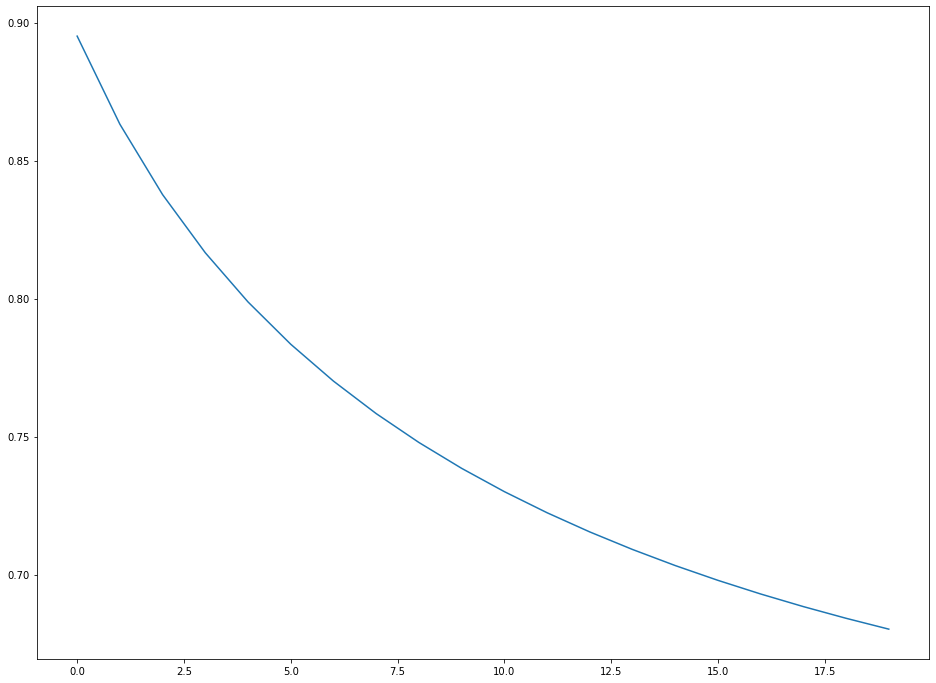

In [1506]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [1507]:
print("cost:", cost_function(X_test, Y_test, theta0, theta1, theta2, theta3, theta4))

cost: 0.6808224117397567


In [1508]:
def sigmoid(x1, x2, x3, x4, theta0, theta1):
       
    return 1/(1 - exp(-theta0 - x1*theta1 - x2*theta2 - x3*theta3 - x4*theta4))

In [1509]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative


for i in range(len(X_test)):
    predictions = sigmoid(X_test[i,0], X_test[i,1], X_test[i,2], X_test[i,3], theta0, theta1)
    if predictions >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if Y_test[i] == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if Y_test[i] == 1:
            fn += 1
        else:
            tn += 1

In [1510]:
tp, fp, fn, tn

(10, 10, 0, 0)

In [1511]:
# Accuracy
(tp + tn) / (tp + fp + fn + tn)

0.5

In [1512]:
# Precision
tp / (tp + fp)

0.5

In [1513]:
# Recall
tp / (tp + fn)

1.0

In [1514]:
# Nesterov Accelerated Gradient

In [1515]:
EPOCHS = 20
LEARNING_RATE = 0.0001
gamma = 0.9
eta = LEARNING_RATE * 0.1

In [1516]:
theta0 = 0.01
theta1 = 0.01
theta2 = 0.01
theta3 = 0.01
theta4 = 0.01

vtheta0 = 0
vtheta1 = 0
vtheta2 = 0
vtheta3 = 0
vtheta4 = 0

costs = []

for _ in range(EPOCHS):
    dt0 = der_theta0(X_train, Y_train, theta0 - gamma*vtheta0, theta1, theta2, theta3, theta4)
    dt1 = der_theta1(X_train, Y_train, theta0, theta1 - gamma*vtheta1, theta2, theta3, theta4)
    dt2 = der_theta2(X_train, Y_train, theta0, theta1, theta2 - gamma*vtheta2, theta3, theta4)
    dt3 = der_theta3(X_train, Y_train, theta0, theta1, theta2, theta3 - gamma*vtheta3, theta4)
    dt4 = der_theta4(X_train, Y_train, theta0, theta1, theta2, theta3, theta4 - gamma*vtheta4)
    
    vtheta0 = gamma*vtheta0 + eta*dt0
    vtheta1 = gamma*vtheta1 + eta*dt1
    vtheta2 = gamma*vtheta2 + eta*dt2
    vtheta3 = gamma*vtheta3 + eta*dt3
    vtheta4 = gamma*vtheta4 + eta*dt4
    
    theta0 = theta0 - vtheta0
    theta1 = theta1 - vtheta1
    theta2 = theta2 - vtheta2
    theta3 = theta3 - vtheta3
    theta4 = theta4 - vtheta4
    
    cost = cost_function(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    costs.append(cost)
    #print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

In [1517]:
print("t0:", theta0, "t1:", theta1, "t2:", theta2, "t3:", theta3, "t4:", theta4, "cost:", cost_function(X_train, Y_train, theta0, theta1, theta2, theta3, theta4))

t0: 0.013446960988266182 t1: 0.022253109588904862 t2: 0.015650271736576373 t3: 0.02126131975145525 t4: 0.014320722007981984 cost: 0.6987380225307925


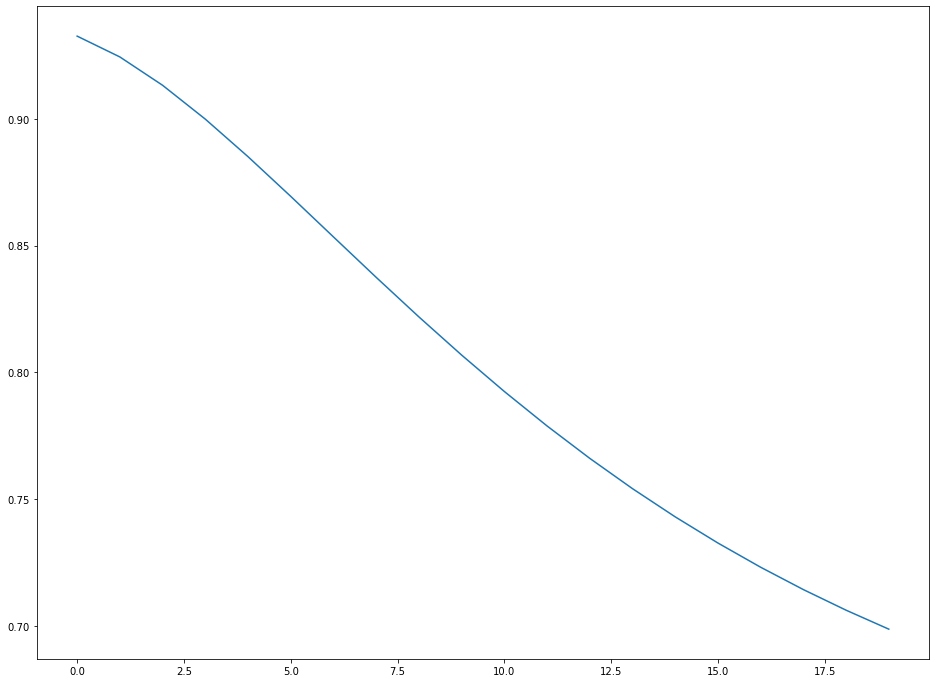

In [1518]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [1519]:
print("cost:", cost_function(X_test, Y_test, theta0, theta1, theta2, theta3, theta4))

cost: 0.6998820133962715


In [1520]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative


for i in range(len(X_test)):
    predictions = sigmoid(X_test[i,0], X_test[i,1], X_test[i,2], X_test[i,3], theta0, theta1)
    if predictions >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if Y_test[i] == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if Y_test[i] == 1:
            fn += 1
        else:
            tn += 1

In [1521]:
tp, fp, fn, tn

(10, 10, 0, 0)

In [1522]:
# Accuracy
(tp + tn) / (tp + fp + fn + tn)

0.5

In [1523]:
# Precision
tp / (tp + fp)

0.5

In [1524]:
# Recall
tp / (tp + fn)

1.0

In [1525]:
#RMSProp

In [1526]:
EPOCHS = 20
LEARNING_RATE = 0.0001
gamma = 0.9
eta = LEARNING_RATE
epcilend = 0.00000001

In [1527]:
theta0 = 0.01
theta1 = 0.01
theta2 = 0.01
theta3 = 0.01
theta4 = 0.01
E0 = 0
E1 = 0
E2 = 0
E3 = 0
E4 = 0

costs = []


for _ in range(EPOCHS):
    dt0 = der_theta0(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    dt1 = der_theta1(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    dt2 = der_theta2(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    dt3 = der_theta3(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    dt4 = der_theta4(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    
    E0 = gamma*E0 + (1 - gamma)*(dt0**2)
    E1 = gamma*E1 + (1 - gamma)*(dt1**2)
    E2 = gamma*E2 + (1 - gamma)*(dt2**2)
    E3 = gamma*E3 + (1 - gamma)*(dt3**2)
    E4 = gamma*E4 + (1 - gamma)*(dt4**2)
    
    theta0 = theta0 - LEARNING_RATE*dt0/((E0 + epcilend)**0.5)
    theta1 = theta1 - LEARNING_RATE*dt1/((E1 + epcilend)**0.5)
    theta3 = theta2 - LEARNING_RATE*dt2/((E2 + epcilend)**0.5)
    theta4 = theta3 - LEARNING_RATE*dt3/((E3 + epcilend)**0.5)
    theta5 = theta4 - LEARNING_RATE*dt4/((E4 + epcilend)**0.5)
    
    cost = cost_function(X_train, Y_train, theta0, theta1, theta2, theta3, theta4)
    costs.append(cost)

In [1528]:
print("t0:", theta0, "t1:", theta1, "t2:", theta2, "t3:", theta3, "t4:", theta4, "cost:", cost_function(X_train, Y_train, theta0, theta1, theta2, theta3, theta4))

t0: 0.012820128753664312 t1: 0.012733563444599392 t2: 0.01 t3: 0.01009915422583741 t4: 0.010198779389209269 cost: 0.892309210123026


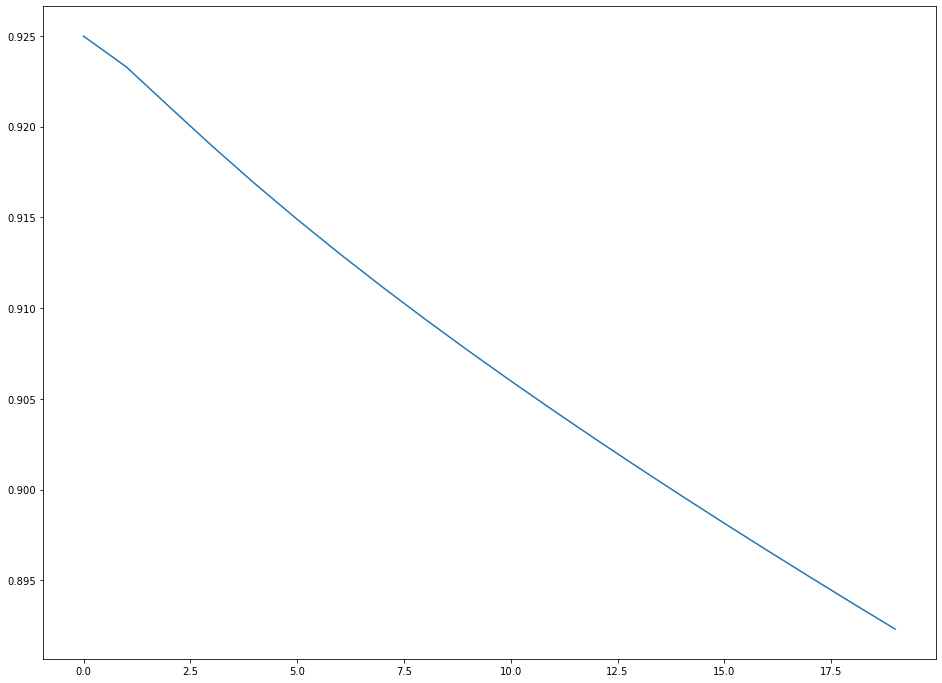

In [1529]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

In [1530]:
print("cost:", cost_function(X_test, Y_test, theta0, theta1, theta2, theta3, theta4))

cost: 0.8969363993387145


In [1531]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative


for i in range(len(X_test)):
    predictions = sigmoid(X_test[i,0], X_test[i,1], X_test[i,2], X_test[i,3], theta0, theta1)
    if predictions >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if Y_test[i] == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if Y_test[i] == 1:
            fn += 1
        else:
            tn += 1

In [1532]:
tp, fp, fn, tn

(10, 10, 0, 0)

In [1533]:
# Accuracy
(tp + tn) / (tp + fp + fn + tn)

0.5

In [1534]:
# Precision
tp / (tp + fp)

0.5

In [1535]:
# Recall
tp / (tp + fn)

1.0